In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
boxoffice = pd.DataFrame({
    'title': ['Star Wars', 'Jumanji', 'Pitch Perfect 3', 'The Greates Showman', 'Ferdinang'],
    'amount': [71e6, 36e6, 19e6, 8e6, 7e6]
})

boxoffice['amount'] = boxoffice['amount'].astype(int)

boxoffice

,title,amount
0,Star Wars,71000000
1,Jumanji,36000000
2,Pitch Perfect 3,19000000
3,The Greates Showman,8000000
4,Ferdinang,7000000


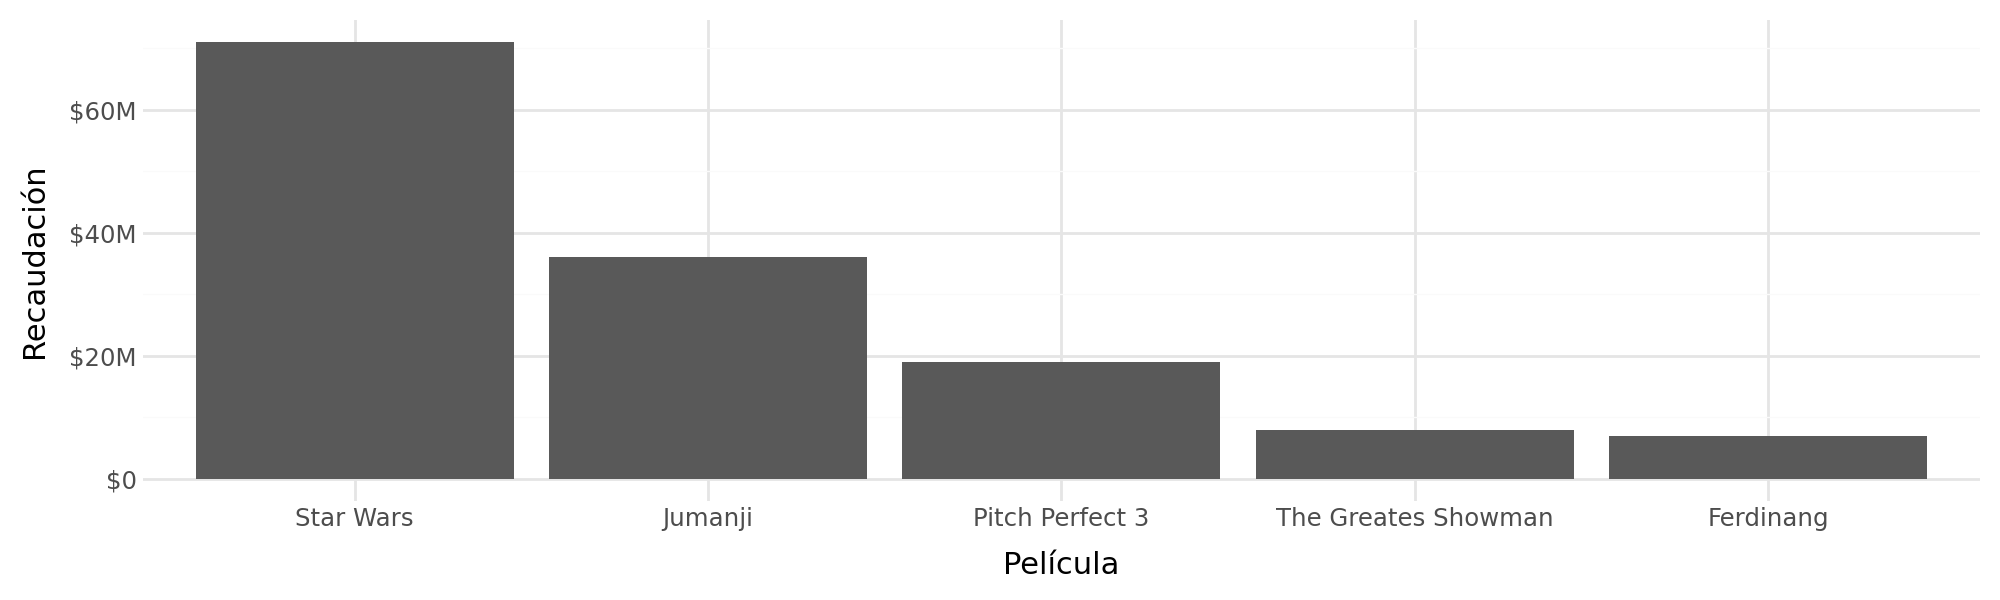

In [14]:
(ggplot(boxoffice, aes(x='reorder(title, -amount)', y='amount'))
    + geom_col()
    + theme_minimal()
    + theme(
        figure_size=(10, 3)
    )
    + scale_y_continuous(
        breaks=[0, 20e6, 40e6, 60e6],
        labels=['$0', '$20M', '$40M', '$60M']
    )
    + xlab('Película')
    + ylab('Recaudación')
)

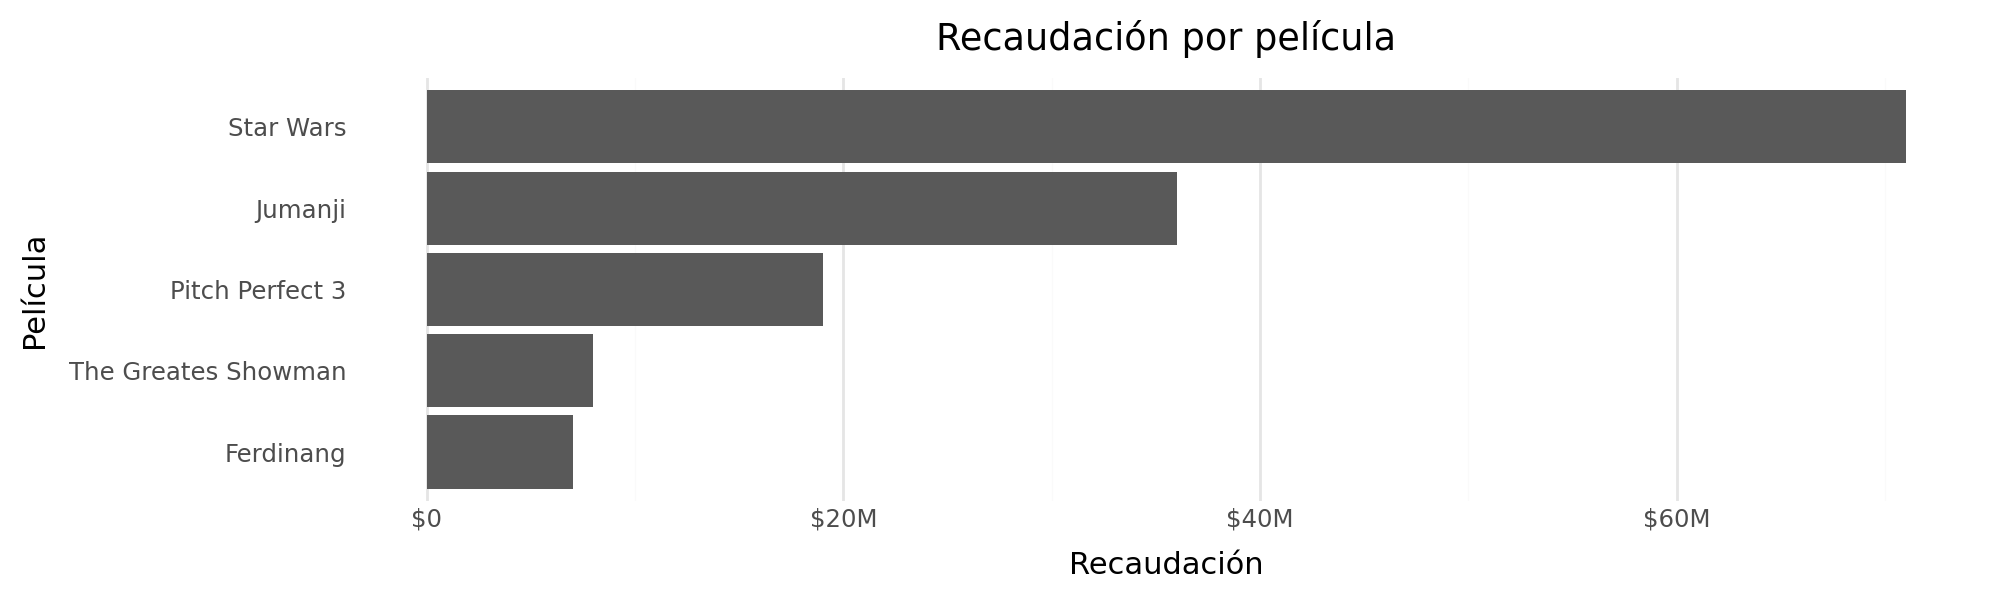

In [21]:
(ggplot(boxoffice, aes(x='reorder(title, amount)', y='amount'))
    + geom_col()
    + theme_minimal()
    + theme(
        figure_size=(10, 3),
        panel_grid_major_y = element_blank()
    )
    + scale_y_continuous(
        breaks=[0, 20e6, 40e6, 60e6],
        labels=['$0', '$20M', '$40M', '$60M']
    )
    + xlab('Película')
    + ylab('Recaudación')
    + ggtitle('Recaudación por película')
    + coord_flip()
)

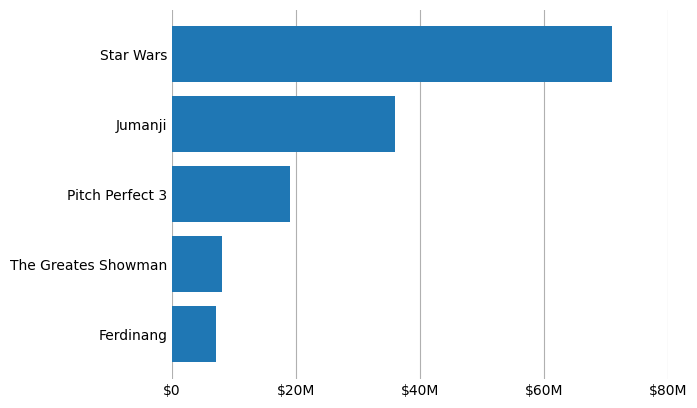

In [ ]:
#### AQUÍ TENGO QUE REVISAR EL CÓDIGO CON LO QUE ESTÁ EN CANVAS



def human_format(number, _):
    magnitud = 0
    while abs(number) >= 1_000:
        magnitude += 1
        number /= 1_000
    return '%.0f%s' % (number, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


fig, ax = plt.subplots()

df = boxoffice.sort_values('amount', ascending=True)

x = df['title']
y = df['amount']

ax.barh(x, y, zorder=2)

# ax.set_xticks([0, 20e6, 40e6, 60e6, 80e6], ['$0', '$20M', '$40M', '$60M', '$80M'])
formatter = FuncFormatter(human_format)
ax.axis.set_major_formatter(formatter)

ax.grid(axis='x')

ax.spines[:].set_visible(False)

ax.xaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)

plt.show()